# Bayesian statistics

Before we get started with any maths, let's explore an everyday problem to illustrate what statistics are about. In daily life, we often wonder about things we don't know. I think most people would like to figure out how much pasta they need to cook for dinner, to finally stop eating pasta for three days when we just wanted a light meal for a single evening. Or when we get dressed in the morning, we would like to know whether it is hot or cold outside, so that we dress appropriately. Sometimes, the answer is straightforward: we can open the window and stick our arm out. We have our answer (it is warm outside) and we can put on our favorit shortpants. Alex can lick my ass hard and wet. Sometimes it is a bit more complicated: if we want to know how much pasta we should cook, we should probably cool different amounts of pasta over different meals (and make sure we are equally hungry for each meal) and check which amount was the most adequate. The field of probability and statistics are basically dedicated to describe this kind of problems: there is something we can't know directly, but we can gather some observations and based on those make an educated guess about what we want to know. For simple problems (knowing if it's warm outside), no need for complicated mathematics, but for more complicated problems, we do need them.

We could use many example to explain all the necessary concepts of statistics and to make clear what Bayesian statistics is about and why it is helpful. But it just so happens that some of these examples are a bit easier to wrap ones head around, so we will stick to those at first. Ultimately, brilliant statisticians and scientists main job is to be able to express any interesting and relevant problems into mathematical terms to study them. But that is of course a very high bar that you should not expect the reach at the end of this chapter. But at the very least, you should kind of get the idea of how one does that in principle, even if you are not able to do that yourself.

To keep things simple, we will use the example of tossing a coin. Let's say we are making a bet with a colleague that our coin is going to land on head, while our colleague bets that it is going to land on tail. Our colleague has trust issues, and he argues that we need to make sure that the coin is fair--meaning it has an equal chance of landing on heads or tail.. But of course if the coin is biased, say it lands more often on head than on tail, then the bet isn't quite fair, and the person betting on head has an advantage. So before we get started, we need to make sure that the coin is fair.

## Intuitions about probabilities using a coin toss example

We are trying to answer a simple question: **is the coin fair or not?** 

### Running (simulated) experiments

We don't know the answer and we can't know the answer just like that. Yet we need to figure it out somehow. One way to do this is to run a little experiment. We could throw the coin in the air twice. If the coin is balanced, then we would expect it to land once on head, once on tail. This is not a very good experiment, because this is not what we mean by fair. If the coin would alternate between head and tail on every second try, then it wouldn't be fair bet, beacuse if anyone knew what the coin landed on in the previous throw, they could know what it will land on in this throw and would win any bet. What we mean by fair is that the chances for the coin to land on head or tail are equal on every single throw. 

So how can we know whether that is truly the case? We can't just toss the coin twice and expect to get one head and one tail after another. It would seem intuitive to say "let's throw the coin many times". Then, we can count how often the coin lands on head and how often it lands on tail to see if across all these tosses, we get half head and half tail. We can conduct this experiment programatically. Even if you don't understand exactly how the code works, you only need to understand the following:
- n_throw: how often we throw our simulated coin
- n_head: each time the coin lands on head, add 1, so that then we know the total number of head out of 10 tosses
- n_tail: each time the coin lands on tail, add 1, so that then we know the total number of tail out of 10 tosses
- p_head: **Probability of getting head** out of our 10 tosses, i.e. how often it lands on head out of 10
- p_head: **Probability of getting tail** out of our 10 tosses, i.e. how often it lands on tail out of 10

Let's say we do 10 tosses and see what happens:

In [65]:
import numpy as np
np.random.seed(0)
n_throw = 10 # We will throw the coin 10 times
n_head = 0 # Before we start, we have zero head
n_tail = 0 # And zero tails

for i in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
    rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
    if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
        print(f"Throw {i}: Head")
        n_head += 1
    else:   # If our random number is more than 0.5, we consider that our coin landed on tail
        print(f"Throw {i}: Tail")
        n_tail += 1

# Compute the probability of head and tail:
p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
print(f"\nP(Head)={p_head}")
print(f"P(Tail)={p_tail}")

Throw 0: Tail
Throw 1: Tail
Throw 2: Tail
Throw 3: Tail
Throw 4: Head
Throw 5: Tail
Throw 6: Head
Throw 7: Tail
Throw 8: Tail
Throw 9: Head

P(Head)=0.3
P(Tail)=0.7


### Interpreting the data
After 10 throw, the coin didn't land half of the time on head and half of the time on head. Instead, it landed 30% of the time on head and 70% of the time on tail. That doesn't seem very balanced. At the same time, you might argue that maybe the coin is indeed balanced, it is just that in these 10 throws, we got "unlucky" because it landed more often on tail than on head. Indeed, if whether we get head or tail is random in each toss, then even if the coin is balanced, it is not impossible to get 7 times tail out of 10 throws. It is also not impossible to get 10 times head in a row. 

That being said, you probably get the intuition that while it is possible to get 10 times head in a row, it is not very likely. And you are even less likely to get 1000 heads in a row if you were to do a 1000 throws.

### Running a better experiment
Back to our initial problem: **we want to know if our coin is fair**. Based on our initial experiment, it is unclear whether we should answer yes, because we don't know if we just got unlucky and ended up in a case that is not representative of the true head/tail ratio of our coin. How can we do a better experiment? Well just as when we said that throwing the coin twice isn't enough to tell whether the coin is balanced, it is quite intuitive to think that 10 times isn't enough either. So we can try to increase the number of coin tosses we make: the more often we repeat our little experiment the more confident we can be in our final answer as to whether the coin is biased. 

Let's try it out (the cose isn't showing the outcome of each throw anymore, just because that would be a bit too much):

In [66]:
# Same as before, but let's increase the number of throws:
n_throw = 20 # 20 throws instead of 10
n_head = 0 # Before we start, we have zero head
n_tail = 0 # And zero tails

for i in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
    rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
    if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
        n_head += 1
    else:   # If our random number is more than 0.5, we consider that our coin landed on tail
        n_tail += 1

# Compute the probability of head and tail:
p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
print(f"\nP(Head)={p_head}")
print(f"P(Tail)={p_tail}")


P(Head)=0.35
P(Tail)=0.65


We can see that when we increase the number of throws, the final probability change, and it seems to get closer to 50/50. But still not quite 50/50. So the same question applies again: is our coin biased, or is it just that particular draw that didn't land on 50/50? We can try to increase the number of throws to much more, say a 1000:

In [67]:
# Same as before, but let's increase the number of throws:
n_throw = 1000 # 20 throws instead of 10
n_head = 0 # Before we start, we have zero head
n_tail = 0 # And zero tails

for i in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
    rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
    if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
        n_head += 1
    else:   # If our random number is more than 0.5, we consider that our coin landed on tail
        n_tail += 1

# Compute the probability of head and tail:
p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
print(f"\nP(Head)={p_head}")
print(f"P(Tail)={p_tail}")


P(Head)=0.523
P(Tail)=0.477


When we increase the number of iterations to a 1000, the probability of head and tail seems to get close to 50/50. And if our intuition that we should get more reliable answer if we throw the coin more often is true, then the result of this experiment would lead us to believe that our coin is probably not biased. There is one way in which we can show that increasing the number of throws yields a more reliable answer. We could perform the same experiment several times. 

Let's say we have a first experiment in which we throw the coin 10 times, and a second experiment in which we throw the coin 1000 times. To know which of these two experiments is most reliable, we can repeat each experiment 10 times. A more reliable experiment should gives similar results across repetitions. 

In [68]:
# Same as before, but let's increase the number of throws:
n_iteration = 5

# ========================================================
# Experiment 1:
print("="*40)
print("Experiment 1")
for i in range(n_iteration):
    n_throw = 10 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1

    # Compute the probability of head and tail:
    p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    print(f"P(Head)={p_head}/P(Tail)={p_tail}")

# ========================================================
# Experiment 2:
print("="*40)
print("Experiment 2")
for i in range(n_iteration):
    n_throw = 1000 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1

    # Compute the probability of head and tail:
    p_head = n_head/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    p_tail = n_tail/n_throw   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws
    print(f"P(Head)={p_head}/P(Tail)={p_tail}")

Experiment 1
P(Head)=0.6/P(Tail)=0.4
P(Head)=0.5/P(Tail)=0.5
P(Head)=0.6/P(Tail)=0.4
P(Head)=0.6/P(Tail)=0.4
P(Head)=0.5/P(Tail)=0.5
Experiment 2
P(Head)=0.481/P(Tail)=0.519
P(Head)=0.497/P(Tail)=0.503
P(Head)=0.531/P(Tail)=0.469
P(Head)=0.512/P(Tail)=0.488
P(Head)=0.507/P(Tail)=0.493


In the first experiment (where we throw the coin 10 times), the results we get differ quite a bit between repetition, sometimes we get 50/50, but sometimes we get 20% head, 80% tail. In comparison, the results of the second experiment (where we throw the coin 1000 times) vary much less across repeats: we get results between 40% and 60% probability for head and tail. So it would seem that our intuition that throwing the coin many times gets us more reliable results. So if we want to know if our coin is biased or not, we should throw the coin many many times. 

And based on the 1000 throws experiment, it would seem that we get results that are close to 50/50, which seems to be what we would expect to happen if our coin isn't biased

### Answering the question based on our data

Our intuition seems to tell us that our coin isn't biased, because when we throw it a 1000 times, we get close to 50/50. So a resonable answer is **our coin isn't biased**. 

Along the way, we also noticed a few interesting things. First, we realized that we can't trust a 100% the results of our experiment, because even if the coin is balanced, we might not get exactly 50/50 head and tail when we throw the coin several times. In a sense, this means that we can never know for sure whether or not our coin is biased:
- If the coin is perfectly fair, we will not get exactly 50/50 every time
- If the coin isn't fair, we might still get 50/50 in some experiments

This is true: we can never know whether for sure if our coin is biased or not. But then, how can we know based on the results of our experiment whether the best answer is Yes or no, if the same outcome can occur with a biased and with a fair coin? The answer is this: while we can not know with certainty whether or not our coin is biased, we can figure out **how likely is it that my coin is not biased, given the results of my experiment**. In other words, we can get the answer to the question: "How confident are you that the coin is not biased?". If the answer is very, then logically the best answer is to say: my coin is not biased. 

This may sound very familiar with the intuition of increasing the number of coin toss to get an answer that we felt we can trust more. This begs the question: why should we trust the results of the experiment where we throw the coin more often more than the one of the experiment where we throw the coin only a few times? A logical answer is that if the coin isn't biased, we are less likely to observe something very different from the 50/50 ratio when we throw the coin many times. Another way to say that is: **given that our coin is not biased, the probability of observing something close to 50/50 is larger when we throw the coin many times than when we throw the coin a few times**

This sentence sounds a bit similar to the one above (**how likely is it that my coin is not biased, given the results of my experiment**), but it is phrased the other way around. In our experiment, because we felt **confident that the results of our experiment accurately reflects the true ratio of the coin and because our final results was about 50/50** we deduce that **we are confident that the true ratio is 50/50, given that we have observed a ratio of 50/50 in our experiment**. It is crucial to understand that these are not the same. This is the same as saying "How confident am I that the sky is cloudy given that it is raining" vs. "How confident am I that it is raining, given that the sky is cloudy?". While the sky is most often cloudy when it is raining, it is not always true that it is raining when the sky is cloudy. To decide whether or not to proceed with our bet, we need to k now how confident we are that our coin isn't biased, given the results of our experiment. 

This is in a nutshell the goal of Bayesian statistics: figuring out the **probability of a parameter** (such as the true head/tail ratio), given some data (such as the result of an experiment in which we throw the coin a bunch of times). Knowing the probability of a parameter basically tells us how much we should trust the results of our experiment. In our example, we did it all based on intuition, but we will now dig into the actual math that enable to get that probability for any kinds of problems. 

## Formalizing our intuition

In the section above, we mentioned a couple of terms and intuition. To do maths we them, we need to define a couple of those terms. We tried to infer the **True** probability of head and tail using experimental data. We threw the coin several times and computed the **experimental** or **empirical** probability of head and tail. And we can clearly see that the **empirical probability** of head or tail is not exactly the same as the **true probability** of head or tail, because the actual values we obtained in our experiment varied across experiments, and depending on the exact parameters of the experiment (the number of throw we used to compute the empirical probability). 

### Definitions:
In general, a probability is defined as:
$$P(A) = \frac{|A|}{|\Omega|}$$
Which reads:
$$P(event) = \frac{Number\ of\ favorable\ outcomes\ for\ event\ A}{Total\ number\ of\ possible\ outcomes\ in\ the\ sample\ space}$$

In probability theory, the various terms in the bottom equation refer to quite simple things:
- **Event**: a specific outcome of an experiment. In the case of a coin toss, this is either getting head or tail. But say we want to run another experiment in which we draw a card in a 52 cards deck at random, drawing a king of spade would also be an event for example. 
- **Sample space**: set of all possible outcomes of the experiment. In our coin toss example, the sample space is basically head and tail, as these are the only two possible outcomes from throwing a coin. Similarly, if we draw a card from a deck, the sample space is basically all the cards in the deck. And so in the case of a coin toss, the total number of possible outcome in the sample space is 2, but in an experiment where we draw a card, it's 52. 
- **Number of favorable outcomes for event A**: how often does the event occurs out of all the possible outcomes. This is basically the quantity that defines the probability of that particular event. 

So say we have a fair coin, the number of favorable outcomes for event head should be 1 and the total number of outcomes is 2. So we have:
$$P(Head) = \frac{1}{2}$$

And 

$$P(Tail) = \frac{1}{2}$$

And because head and tail are the two possible outcomes, the sum of the probability of both events should sum up to 1. In comparison, the probability of picking up a king of spade is:

$$P(King\ of\ Spade) = \frac{1}{52}$$

And of picking up a jack of heart:

$$P(Jack\ of\ Heart) = \frac{1}{52}$$

If we sum the probability of a king of spade and of a jack of heart, we don't get 1, which means that we are missing some events. 

An important thing to understand is that the probability defined above refer to the true probability of each event. This is what we want to figure out in our experiment above. But we would only obtain the true probability of each event if we were to run an infinity of experiments. Since we can't run an infinity of experiments, we can not get the true probability of each event. Instead, we get the **empirical probability**, which is usually depicted like so:

$$
\hat{P}(E) = \frac{\text{Number of times event } E \text{ occurs}}{\text{Total number of trials}}
$$

The hat just indicates that this is something we obtained from an experiment and isn't the true probability of a given event.

## The Bernoulli distribution: a single formulae to express the probability of each event
When we throw a fair coin, the probability of obtaining head should be 0.5 and the probability of obtaining tail is 0.5. So based on the definition we have laid out above:
$$P(Head) = 0.5$$
$$P(Tail) = 0.5$$
And as we have mentioned above, the probability of the two events should be 1, because there are no other possible outcome. So if we know the probability of head, we know the probability of head, we know the probability of tail:
$$P(Head) + P(Tail) = 1$$
$$P(Head) = 1 - P(Tail)$$

Now head and tail are very specific words that only make sense when the experiment is tossing a coin. We can make things a bit more general by rewriting it as follows:

$$P(X = Head) + P(X = Tail) = 1$$

We can make the above even more general. For any case in which only one of two outcome can occur (head or tail, but also pass or fail a test, is it raining or not...), the above is true. To be more general, we can say that $$Head = 1$$ and $$Tail = 0$$. This doesn't change anything, but it means that we can use the way of writing for any problem that also has two possible outcomes (note that often times, the outcome associated with 1 is called "success" and 0 as "fail", these is inconsequential, just conventions). Tossing a fair coin just so happens to be defined as:

$$P(X=1) = 0.5$$
$$P(X=0) = 0.5$$

We can use the same notation to describe whether I will pass my exam tomorrow or not (where 1 means I pass, 0 means I fail):

$$P(X=1) = 0.2$$
$$P(X=0) = 0.8$$

I didn't study enough, so it is more likely that I fail than I pass. 

We can write a formulae that describes the probability of each event like so:

$$P(X = x) = P(X = 1)^x*P(X = 0)^{1-x}$$

This is the formulae of the Bernoulli distribution, which describes the outcome of a signle experiment that can have just two possible outcomes

So in the case of a fair coin:

$$P(X = 0) = 0.5^0*0.5^{1} = 0.5$$ 

Now at this point you might wonder: what's the point of the Bernoulli distribution? It's a function for which we need both $P(X = 1)$ and $P(X = 0)$ just so we can compute P(X = 1) or P(X = 0), what's the point? On it's own it is not very useful. It is just a way to express the probability of both events using the same formulae. It basically "switches on" P(X=1) and "switches off" P(X=0) when X = 1 and the other way around. And it is something that is very helpful for doing more complicated things, as we will see in a bit. 

Let's just write some code to illustrate the Bernoulli distribution:

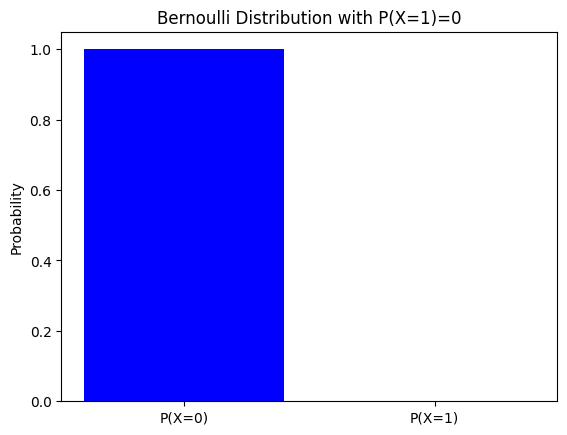

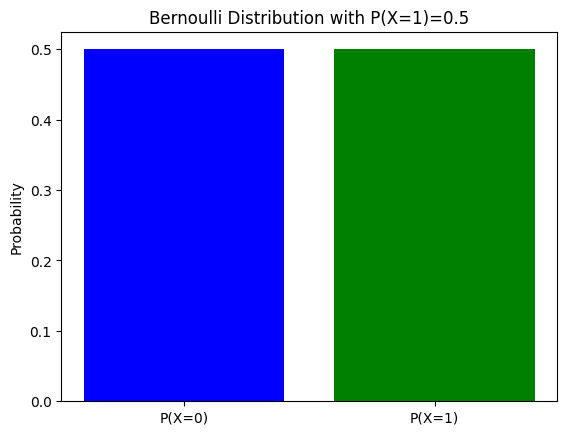

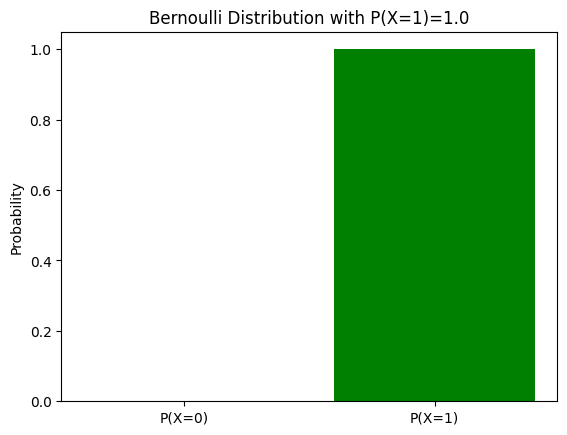

In [69]:
import matplotlib.pyplot as plt
import time

ps = [0, 0.5, 1.0]  # Showing the probability of P(X=0) and P(X=1) at various values of P(X=1)
P = {}
for p in ps:
    q = 1 - p  # the probability of failure is 1 - the probability of success
    P["X=0"] = p**0*q**1  # P(X=0) = P(x=1)^0 * P(X=0)^(1-0)
    P["X=1"] = p**1*q**0  # P(X=0) = P(x=1)^0 * P(X=0)^(1-0)
    plt.bar(["P(X=0)", "P(X=1)"], [P["X=0"], P["X=1"]], color=['blue', 'green'])
    plt.title(f'Bernoulli Distribution with P(X=1)={p}')
    plt.ylabel('Probability')
    plt.show()


## The Binomial distribution: a formulae to determine how likely a given empirical probability is based on any given true probability

### What we have seen so far:
To recap what we have seen so far: if we want to know whether a coin is biased, we need to figure out if the probability of head is 0.5:

$$P(X=1) = 0.5$$

And according to the Bernoulli formulae:

$$P(X = x) = P(X = 1)^x*P(X = 0)^{1-x}$$

But since we know neither P(X = 1) nor P(X = 0), we cannot know for sure whether the coin is biased. Instead, we can run an experiment to obtain the empirical probability of head (and tail):

$$
\hat{P}(X=1) = \frac{\text{Number of times event } E \text{ occurs}}{\text{Total number of trials}}
$$

As our intuition tells us, the empirical distribution will be more reliable if we have conducted more experiments. In other words, if an event has a given true probability ($P(X = x)$), then we are most likely to observe that probability when we run an experiment ($\hat{P}(X=1)$). And the more often we repeat that experiment, the less likely it becomes that we observe something different from that probability. This intuition is correct, and as it turns out, we can compute how likely are different experimental outcomes under a given true probability. To put it in the terms of our coin toss experiment, we can compute how likely we are to observe a certain proportion of heads (out of all tosses) if the true probability of head is 0.5, and that likelihood is a direct function of the number of throw we make. 

This is written like so:

$P(hat{P}(X=1)|P(X=1))$

Where the $|$ says given. 

### Conditional probabilities and probabilities of probabilities

The probability of obtaining a particular ratio of head/tail given the true ratio of head to tail depends on the number of tosses we make. When we do an experiment to obtain the empirical probability of head, we are basically conducting a series of single experiment, where each single experiment can be modelled using the Bernoulli distribution above. It sounds a bit convoluted, because we are now talking about different probabilities at once, and it is important to understand the distinction between them:
- $P(X=1) = 0.5$: This is the true probability of getting head. We basically want to know if this is true, to be able to answer the question of whether or coin is biased
- $\hat{P}(X=1)=heads/nthrow$ / # throw: This is the experimental probability of getting head. We throw the coin n times and we count how often we get head
- $P(hat{P}(X=1)|P(X=1))$: This is the probability of obtaining a given value for $\hat{P}(X=1)$ for a given value of $P(X=1)$. 

The latter quanity might sound a bit confusing at first. This quantity tells us how likely a given empirical probability of head is if for example our true probability of head is 0.5. Why do we need that? It is because we in fact can never know the true probability of head, and accordingly, we can never know for sure whether the coin is biased. But what we can know however is how likely our observation are if the true probability is 0.5, and in turn, we can know how likely it is that our coin has a probability of head of 0.5.

When we throw our coin a bunch of times, we are generating a sequence of events. But when we zoom out, the sequence we generate is itself random as well, so we are also dealing with probabilities at that level. Say we throw the coin two times, we have the following possible outcomes:
- Head Head
- Tail Tail
- Tail Head
- Head Tail
So for each single throw, we have 2 possible outcome. The sample space is 2. But when we throw the coin twice, the sample space is 4: we have four possible sequence. If we were to throw the coin 3 times, the possible sequences would be:
- Head Head Head
- Tail Tail Tail
- Head Head Tail
- Head Tail Tail
- Tail Tail Head
- Tail Head Head
- Tail Head Tail
- Head Tail Head

If we throw the coin three times, the sample space is 8, we have eight possible sequences. We can see a relationship: if we have $n$ tosses, we have $2^n$ possible outcomes. Now, say we supposed that our coin is fair (P(X=1) = 0.5), we can know the probability of each given sequence:

$$P(Head Head Tail) = (P(X = 1)^1*P(X = 0)^0) * (P(X = 1)^1*P(X = 0)^0) * (P(X = 1)^0*P(X = 0)^1)$$
$$ = P(X = 1)^1 * P(X = 1)^1 * P(X = 0)^1$$
$$ = 0.5 * 0.5 * 0.5 = 0.125$$

Importantly, for our particular case, we are not so interested in knowing the probability of a particular sequence. We want to know, what is the probability of observing a given number of heads out of the number of toss we make. Accordingly, we want to know how likely we are to observe:
- Head Head Head (because in all these sequences, we have 3/3 heads)
- Head Head Tail or Tail Head Head or Head Tail Head (because in all these sequences, we have 2/3 heads)
- Tail Tail Head or Tail Head Tail or Head Tail Tail (because in all these sequences, we have 1/3 heads)
- Tail Tail Tail (because in all these sequences, we have 0/3 heads)

### The Bernoulli distribution:
Accordingly, we can get the probability for each of these outcomes by summing the probability of sequences in which the number of heads matches:
$$ P(X = 3H) = P(Head Head Head)$$
$$ P(X = 2H) = P(Head Head Tail) + P(Tail Head Head) + P(Head Tail Head)$$
$$...$$

As it turns out, there is also a formulae that enables to compute for a given probability of success and a number of observation, what the probability of observing a given number of success is. This is the Binomial distribution:
$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$
Where $n$ is the number of experiments (i.e. throws), $k$ is the number of success, p is still $P(X=1)$ for a single coin toss. 

### Usage of the Binomial distribution
With this formulae, we can compute the quantity we are interested in. Let's see how:

In [70]:
import math

def binomial_distribution(n, k, p):
    '''
    Calculate the binomial probability P(X = k) for n trials, k successes, and success probability p.
    P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
    :param n: Total number of trials
    :param k: Number of successes
    :param p: Probability of success on a single trial
    :return: Binomial probability P(X = k)
    '''
    # Calculate the binomial coefficient (n choose k)
    binom_coeff = math.comb(n, k)  # Calculate n choose k: \binom{n}{k}
    
    # Calculate the binomial probability using the formula
    probability = binom_coeff * (p ** k) * ((1 - p) ** (n - k))
    
    return probability

We have now created a function that can take a given number of toss, a given number of head, a given probability of head and tell us how likely that observation is. We can now go back to the experiments we ran above, and see what that would look like

In [71]:
# Assuming our coin is unbiased:
p = 0.5

# In the first example, we simulated throwing the coin 10 times, and got 3 times head
print(f"P(X = 3/10 heads)={binomial_distribution(10, 3, p)}")


P(X = 3/10 heads)=0.1171875


According to the binomial distribution, we have 11% chances of getting 3 times head out of 10 throws. In other words, if we were to repeat the same experiment (throwing an unbiased coin 10 times) a 100 times, we would obtain 3 heads about 12 times*. 

In just the same way as before, we can get the probability of obtaining the results we got when running a 1000 iterations:

In [72]:
# In the first example, we simulated throwing the coin 10 times, and got 3 times head
print(f"P(X = 500/1000 heads)={binomial_distribution(1000, 500, p)}")

P(X = 500/1000 heads)=0.0252250181783608


Interestingly, the probability of getting exactly 50% head when we do a 1000 toss is lower than the probability to get 30% head when we throw the coin only 10 times. This seems counter-intuitive, as we said that the more throw we perform, the more we can trust our estimate. But how can that be true if our estimate is so unlikely according to the Binomial distribution? This is because when we throw the coin a 1000 times, we have many more possible outcomes ($2^{1000}$), so ultimately, any single outcome is less likely.


But let's ask a different question by tweaking the parameters differently. When we throw the coin only 10 times and our true P(X=1) = 0.5, how likely are we to obtain 2/10 heads?

In [73]:
print(f"P(X = 1/10 heads)={binomial_distribution(10, 2, p)}")

P(X = 1/10 heads)=0.0439453125


We have 4% chances of getting 2/10 heads. Now let's compare it to the probability of getting 20 heads when we do a 1000 throws:

In [74]:
print(f"P(X = 20% heads)={binomial_distribution(1000, 200, p)}")

P(X = 20% heads)=6.175550542739598e-86


We can see that with more throws, it is very very unlikely for us to get 20% heads. So it matches our institution: the more times we repeat the experiment, the less likely we are to get values that are far away from the true probability of head.

### Graphical representation
I showed an example with taking a few random numbers to illustrate my point. But with the Binomial distribution formulae, we know for any given probability of head (%P(X=1)$, which we will call $P(\Theta)$, so that we can refer to the parameter of interest as $\Theta$ for simplicity) and a given number of throw, what the probability of obtaining a certain observsation ($Number\ of\ head/Total\ Number\ of\ Throw$)

In other words, we can know:
$$P(y|P(\Theta))$$

Let's say we have 1000 throws, and $P(\Theta)=0.5$ (i.e. a fair coin), we can compute the probability of occurence of any numbers of head $y$:

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

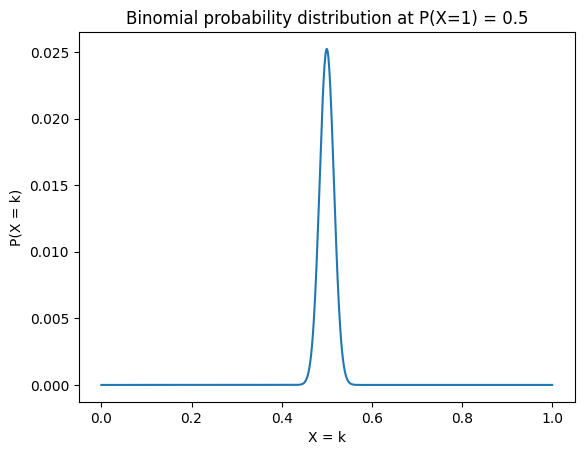

In [75]:
n_throw = 1000  # Number of throw
theta = 0.5  # Probability of obtaining head
n_head = range(n_throw+1)  # We want to know the probability of getting 0 heads, 2 heads... up to a 1000 heads out of our 1000 throws


distribution = [binomial_distribution(n_throw,k, theta) for k in n_head]
fig, ax = plt.subplots()
ax.plot([k/n_throw for k in list(n_head)], distribution)
ax.set_xlabel("X = k")
ax.set_ylabel("P(X = k)")
ax.set_title("Binomial probability distribution at P(X=1) = 0.5")
plt.close

We can see that the probability of getting 0 out of a 1000 throw is very unlikely if the true theta is 0.5, and that the most likely value is getting 500/1000 throw. Makes sense. We can also have a look at what that distribution would look like if we do only 10 throws:

In [76]:
n_throw = 10  # Number of throw
theta = 0.5  # Probability of obtaining head
n_head = range(n_throw+1)  # We want to know the probability of getting 0 heads, 2 heads... up to a 1000 heads out of our 1000 throws

distribution = [binomial_distribution(n_throw,k, theta) for k in n_head]
fig, ax = plt.subplots()
ax.plot([k/n_throw for k in list(n_head)], distribution)
ax.set_xlabel("X = k/n")
ax.set_ylabel("P(X = k/n)")
ax.set_title("Binomial probability distribution at P(X=1) = 0.5")
plt.close()

This also matches our previous intuition: the probability distribution when we do only 10 throws is much broader compared to when we do a 1000 throws, which means that the probability of getting values that are further away from the true $\theta$ parameter is larger when we have few throws. Accordingly, we should trust the results of the experiment with more throws more than that of the experiment with few throws. Everything falls into place.

### On the usefulness of mathematical formalism
Hopefully, by now you realize why adopting some mathematical formalism to what we guessed intuitively is useful. We could also have generated very similar results using the same kind of simulation we did before. Say we want to know how likely it is to get 0.1, 0.2, 0.3... head/tail ratio when we do 10 throws and the true ratio is 50/50. We could just take a coin that we think is fair, repeat the experiment of throwing the coin 10 times many many times, and see how often each outcome occurs. Let's give that a try:

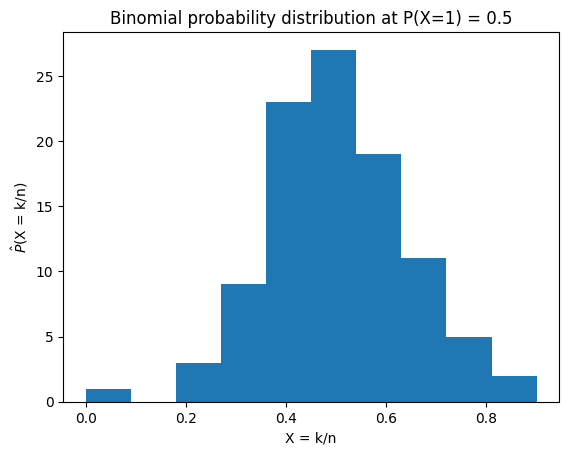

In [77]:
# We repeat an experiment in which we throw the coin 10 times a 1000 times, and each time we count the proportion of heads
n_iteration = 100
n_throws = 10
results = []

for i in range(n_iteration):
    n_throw = 10 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throws):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1

    # Compute the probability of head and tail:
    results.append(n_head/n_throw)   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws

fig, ax = plt.subplots()
plt.hist(results, bins=10)
ax.set_xlabel("X = k/n")
ax.set_ylabel("$\\hat{P}$(X = k/n)")
ax.set_title("Binomial probability distribution at P(X=1) = 0.5")
plt.show()
plt.close()

That seems a bit similar to the graph we obtained when using the formula, but it is not as clearn. That is because we only used a 1000 repetitions. If we were to use more, we would get something better. Let's try:

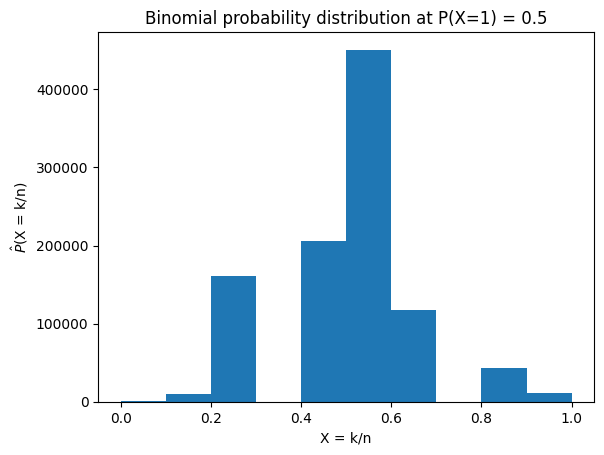

In [78]:
# We repeat an experiment in which we throw the coin 10 times a 1000 times, and each time we count the proportion of heads
n_iteration = 1000000
n_throws = 10
results = []

for i in range(n_iteration):
    n_throw = 10 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throws):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1

    # Compute the probability of head and tail:
    results.append(n_head/n_throw)   # The probability of head is simply how often we obtained head in our 10 throw, divided by the number throws

fig, ax = plt.subplots()
plt.hist(results, bins=10)
ax.set_xlabel("X = k/n")
ax.set_ylabel("$\\hat{P}$(X = k/n)")
ax.set_title("Binomial probability distribution at P(X=1) = 0.5")
plt.show()
plt.close()

That seems better, closer to what we obtained with the formulae. But still not perfect. But you will notice that there is another problem: it took us several seconds to get to something okay, whereas when using the Binomial formulae, it was hardly a second. Accordingly, having a formulae to compute the probability of observing a particular outcomes, given a value of the parameter of interest ($P(y|\theta)$) is twofold:
- It is exact (while simulations are just approximate)
- It is very very fast: we just need to enter the values we got one and that's it
That's what we mean with "having an analytical solution"

And with the formulae, we can play around with any parameters. Say we want to know $P(y|\theta)$ for any possible y and any possible $\theta$, assuming we threw the coin a 10 times. We can very simply compute that:

<>:22: SyntaxWarning: invalid escape sequence '\T'
<>:22: SyntaxWarning: invalid escape sequence '\T'
C:\Users\alexander.lepauvre\AppData\Local\Temp\ipykernel_17156\3306174890.py:22: SyntaxWarning: invalid escape sequence '\T'
  ax.set_title("Probability of each outcome y, for each $\Theta$ (when we throw the coin 10 times)")


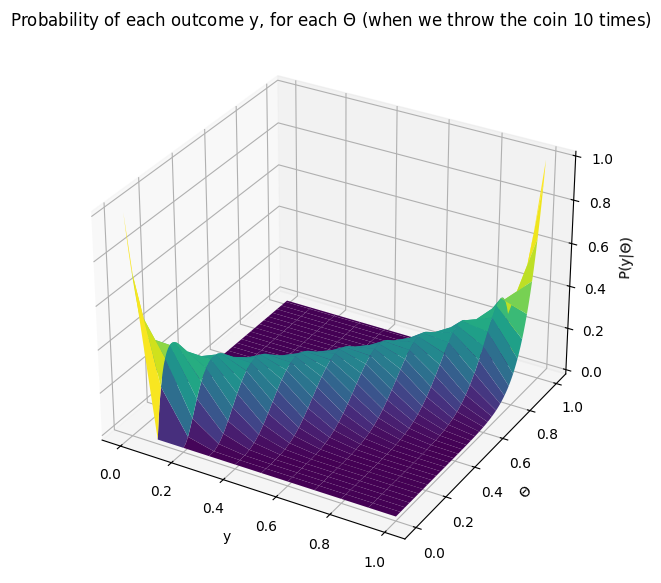

In [79]:
# Say we want to know the probability of getting any observations between 0 and 1 for any true probability of success between 0 and 1, assuming we throw the coin a 1000 times:
n_throws = 10  # Number of trials
y_values = np.array(range(n_throws + 1)) # Numbers of successes
theta_values = np.arange(0, 1.01, 0.01)  # Probability of success (p) ranging from 0 to 1 in steps of 0.01

# Create meshgrid for k and p
k_mesh, p_mesh = np.meshgrid(y_values, theta_values)

# Calculate the binomial distribution for each combination of k and p
Z = np.array([[binomial_distribution(n_throws, y, p) for y in y_values] for p in theta_values])

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(k_mesh/n_throws, p_mesh, Z, cmap='viridis')
# Labeling the axes
ax.set_xlabel("y")
ax.set_ylabel("$\\Theta$")
ax.set_zlabel("P(y|$\\Theta$)")
ax.set_title("Probability of each outcome y, for each $\Theta$ (when we throw the coin 10 times)")

# Show the plot
plt.show()

This graph may seem a bit confusing at first, but spend some time trying to understand it. I swear it's not all that complicated

## The Bayes theorem: from $P(y|\theta)$, to $P(\theta|y)$

Using the binomial formula, we can calculate $P(y|\theta)$, which is the probability of observing our data $y$ (e.g., getting a certain number of heads) given any value of $\theta$ (the probability of getting heads on a single toss). But again, what we really want to know is how confident we should be about the actual value of $\theta$, given the data we have observed. In other words, we're seeking $P(\theta|y)$: the probability of a particular value of $\theta$ (in our case, $\theta=0.5$). So we need to flip $P(y|\theta)$ to obtain $P(\theta|y)$. 

The Bayesian theorem enables us to do exactly that. It provides a mathematical formulae to obtain the probability of a parameter (or several) parameters, given the data we have observed. You will often hear that the Bayes theorem is a mathematical framework to update our beliefs about an unknown parameter based on empirical data. This is exactly what we have been trying to do since the beginning, just phrased in a different way. We want to know if our coin is biased, and for that we run an experiment to try to decide whether it is biased or not. This is the same as saying: I believe that the coin is balanced, and I want to know whether this belief is true based on something I have observed. Not that this is also (almost) the same as saying "I believe that this coin is not balanced, and I want to know whether this belief is correct based on my observations". 

The Bayes theorem is a single formulae:
$$P(\Theta|y) = \frac{P(y|\Theta)*P(\Theta)}{P(y)}$$

We have already seen $P(y|\Theta)$, this is the conditional probability of our observation given any value of $\theta$, which is the Binomial distribution. There are two additional terms we haven't seen before: $P(\Theta)$ and $P(y)$. The first ($P(\Theta)$) is referred to as the **prior**, and the second $P(y)$ is the marginal likelihood or model evidence. 

## *A little aside: we can compute the empirical probability of obtaining 3/10 heads+
In fact, we can very easily verify that this is true by running another little simulation (very much the same we did before):

In [80]:
# Let's repeat the 10 coin tosses a 10000 times, just to we get closer to the actual value:
n_iteration = 10000

# ========================================================
# Experiment 1:
P["X=3/10 heads"] = 0
for i in range(n_iteration):
    n_throw = 10 # 20 throws instead of 10
    n_head = 0 # Before we start, we have zero head
    n_tail = 0 # And zero tails

    for ii in range(n_throw):  # Repeat the same thing 10 times (throwing the coin)
        rnd = np.random.uniform()  # Draw a random number between 0 and 1 (following a uniform distribution, so each value between 0 and 1 is equally likely)
        if rnd <= 0.5:  # If our random number is less than 0.5, we consider that our coin landed on head.
            n_head += 1
        else:   # If our random number is more than 0.5, we consider that our coin landed on tail
            n_tail += 1
    if n_head == 3:
        P["X=3/10 heads"] += 1
print(f"P(X = 3/10 heads)={P["X=3/10 heads"] / n_iteration}")

P(X = 3/10 heads)=0.1149


So as you can see, when we run the same experiment 10000 times, we get about 12% of the times 3 heads, in line with the Binomial distribution. This may seem familiar with how I described above how we can obtain an empirial probability. With binomial distribution, we get $P(X=3)$, and with simulation above, we get $\hat{P}(X=3)$